In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

# Método leapfrog

$$ \vec{a}(t) = F(x(t)) $$

$$ \vec{v}_{n+1/2} = \vec{v}_{n-1/2} + \vec{a}(x_{n})\Delta t $$

$$ \vec{v}(t + \Delta t/2) = \vec{v}(t - \Delta t/2) + \vec{a}(t)\Delta t $$

$$ \vec{r}_{n+1} = \vec{r}_{n} + \vec{v}_{n+1/2} \Delta t $$

$$ \vec{r}(t+\Delta t) = \vec{r}(t) + \vec{v}(t + \Delta t/2) \Delta t $$

Para iniciar el método necesitamos $\vec{v}_{-1/2}$, el cuál lo podemos inicializar con el método de Euler.

$$ \vec{v}_{-1/2} = \vec{v}(0) - \Delta t/2 \vec{a}(0)  $$

In [2]:
TMin, TMax, N = 0.,10., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)
print(h, t.shape)

0.05 (201,)


In [3]:
t1 = np.arange( TMin - 0.5*h, TMax - 0.5*h + h , h)
print(t1.shape)
#print(t1)

(201,)


In [4]:
def GetA(x):
  #  return -np.pi**2*x
    return -np.pi**2*np.sin(x)

In [23]:
r0 = np.array([4.,0.])
x = np.zeros(N)
v = np.zeros(N)

In [15]:
x[0] = r0[0]
v[0] = r0[1] - 0.5*h*GetA(x[0])

In [16]:
print(v[0])

0.03481996631573578


In [17]:
def GetLeapFrog(x,v,h):
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]

In [18]:
GetLeapFrog(x,v,h)

<IPython.core.display.Javascript object>


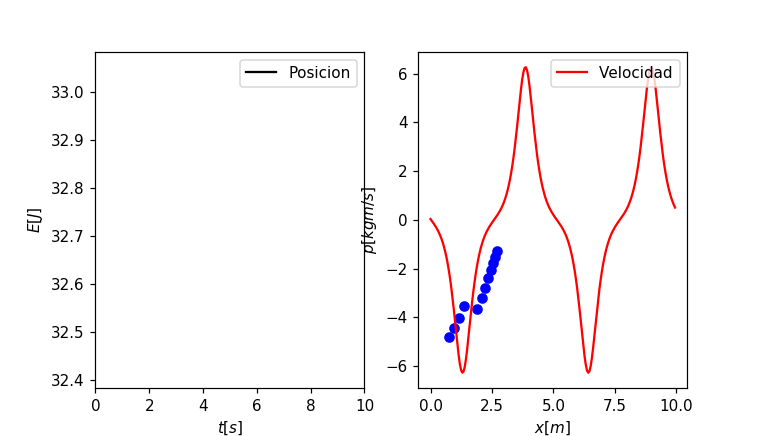

In [19]:
fig0 = plt.figure(figsize=(7,4))
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
ax.plot(t,x, '-k',label='Posicion')
ax1.plot(t1,v, '-r',label='Velocidad')
ax.legend(loc=1)
ax1.legend(loc=1)
plt.show()

In [20]:
X = np.array([])

for i in range(len(x)-1):
    X = np.append(X, 0.5*(x[i] + x[i+1]) )
    
V = v[1:]

In [21]:
E = 0.5*np.pi**2*X**2 + 0.5*V**2
meanE = np.mean(E)
print(meanE)

32.68340952399634


<IPython.core.display.Javascript object>


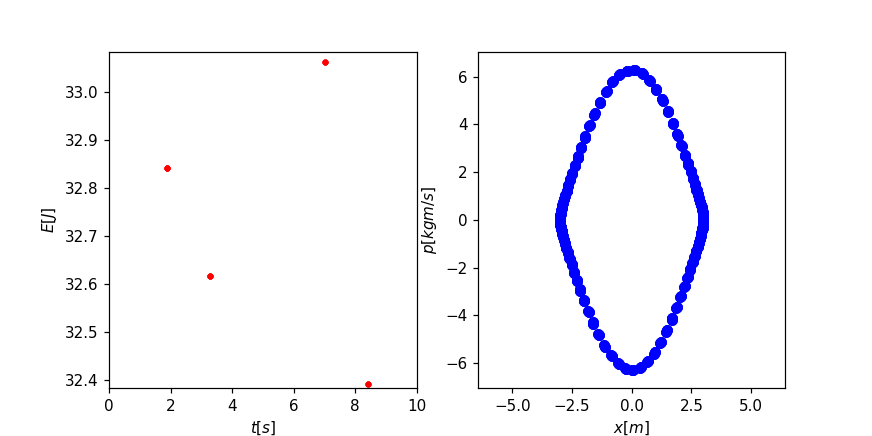

In [22]:
fig2 = plt.figure(figsize=(8,4))
ax = fig2.add_subplot(1,2,1)
ax1 = fig2.add_subplot(1,2,2)

def init():
    ax.set_xlim(TMin,TMax)
    ax.set_ylim(meanE-0.3,meanE+0.4)
   # ax1.set_xlim(np.min(V),np.max(V))
   # ax1.set_ylim(np.min(V),np.max(V))
    
    ax1.axis('equal')
    
def Update(i):
    
   # plot = ax.clear()
  #  plot = ax1.clear()
    init()
    
    plot = ax.scatter(t1[i+1],E[i],c='r',marker='.',label='Energía')
    plot = ax1.scatter(X[i],V[i],c='b',label='Phase space')
    
    plot = ax.set_xlabel(r'$t[s]$')
    plot = ax.set_ylabel(r'$E[J]$')
    
    plot = ax1.set_xlabel(r'$x[m]$')
    plot = ax1.set_ylabel(r'$p[kgm/s]$')
    
    #plot = ax.legend()
    #plot = ax1.legend()
    
    return plot

Animation = anim.FuncAnimation(fig2,Update,frames=len(X),init_func=init)